<a href="https://colab.research.google.com/github/KrishPraba/Pump-it-Up-Data-Mining-the-Water-Table/blob/main/Pump_it_Up_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

#**Loading Data**

In [3]:
features_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Train_set_values.csv")    # train set data

labels_df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Train_set_labels.csv")      # train set labels data

In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [6]:
print(features_df.shape)
print(labels_df.shape)

(59400, 40)
(59400, 2)


In [7]:
labels_df.drop(columns=['id'],inplace=True)
features_df.drop(columns=['id'],inplace=True)

In [9]:
joined_df = features_df.join(labels_df)
print(joined_df.shape)

(59400, 40)


#**Analysing Data**

**Analysing missing values and unique column values**

---



In [10]:
joined_df.isna().sum()      # Number of null values in the dataframe columns

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [12]:
for col in features_df.columns:
  print('\033[1m' + col + '\033[0m' +" : "+str(len(joined_df[col].unique())))

amount_tsh : 98
date_recorded : 356
funder : 1898
gps_height : 2428
installer : 2146
longitude : 57516
latitude : 57517
wpt_name : 37400
num_private : 65
basin : 9
subvillage : 19288
region : 21
region_code : 27
district_code : 20
lga : 125
ward : 2092
population : 1049
public_meeting : 3
recorded_by : 1
scheme_management : 13
scheme_name : 2697
permit : 3
construction_year : 55
extraction_type : 18
extraction_type_group : 13
extraction_type_class : 7
management : 12
management_group : 5
payment : 7
payment_type : 7
water_quality : 8
quality_group : 6
quantity : 5
quantity_group : 5
source : 10
source_type : 7
source_class : 3
waterpoint_type : 7
waterpoint_type_group : 6


In [13]:
df_categorical = features_df.select_dtypes(include='object')
object_cols = df_categorical.columns.tolist()     #String columns in the dataset

df_numerical = features_df.select_dtypes(exclude='object')
numeric_cols = df_numerical.columns.tolist()      #Numeric columns in the dataset

print(object_cols)
print(numeric_cols)

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']
['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']


In [20]:
def count_plot(col, target, data):
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    print(group_counts.sort_values(ascending = False))
    print()

In [15]:
def column_plot(col, target, data, ax=None):
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="bar", stacked=False, ax=ax)
    ax.legend().remove()

**Analysing numeric columns**

---



In [21]:
for idx, col in enumerate(numeric_cols):
    count_plot(
        col, 'status_group', joined_df
    )

amount_tsh
0.0         41639.0
500.0        3102.0
50.0         2472.0
1000.0       1488.0
20.0         1463.0
             ...   
5400.0          1.0
6300.0          1.0
8500.0          1.0
38000.0         1.0
350000.0        1.0
Length: 98, dtype: float64

gps_height
 0       20438.0
-15         60.0
-13         55.0
-16         55.0
-20         52.0
          ...   
 2278        1.0
 2274        1.0
 2270        1.0
 2264        1.0
-90          1.0
Length: 2428, dtype: float64

longitude
0.000000     1812.0
37.328905       2.0
39.091380       2.0
39.091434       2.0
39.091785       2.0
              ...  
36.697013       1.0
36.696889       1.0
36.696881       1.0
36.696791       1.0
35.004681       1.0
Length: 57516, dtype: float64

latitude
-2.000000e-08    1812.0
-6.991294e+00       2.0
-6.983606e+00       2.0
-6.985842e+00       2.0
-6.965834e+00       2.0
                  ...  
-3.907373e+00       1.0
-3.907444e+00       1.0
-3.907677e+00       1.0
-3.907874e+00       1.0
-1.

In [22]:
joined_df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [23]:
joined_df.corr()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
amount_tsh,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


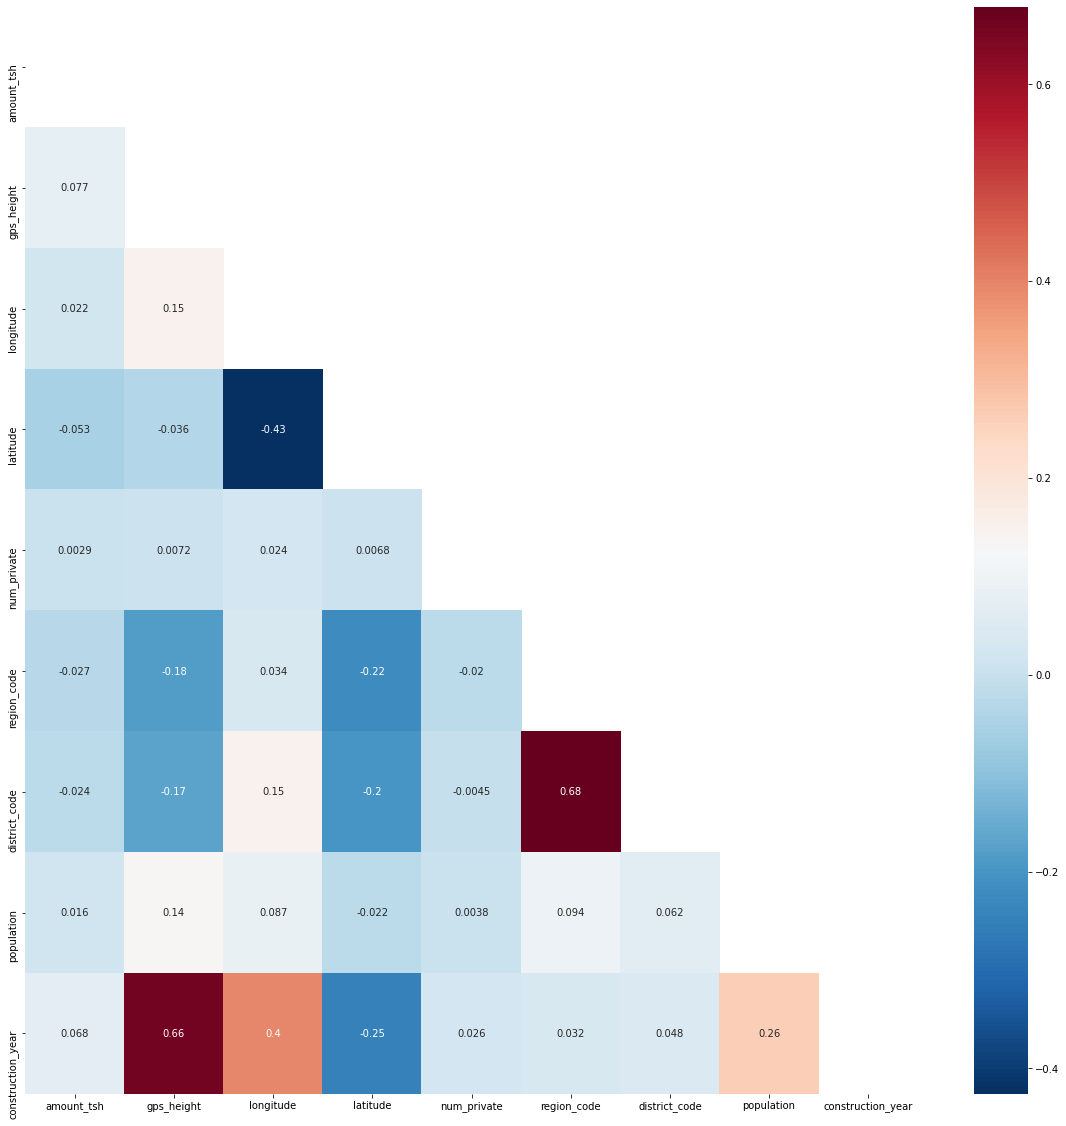

In [25]:
mask = np.zeros_like(joined_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
sns.heatmap(joined_df.corr(), cmap='RdBu_r', annot = True, mask = mask )

Positive coorelation between **Construction year and Gps height** and **District code and Region code**
Negative coorelation between **latitude and longitude**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b5518da10>,
      dtype=object)

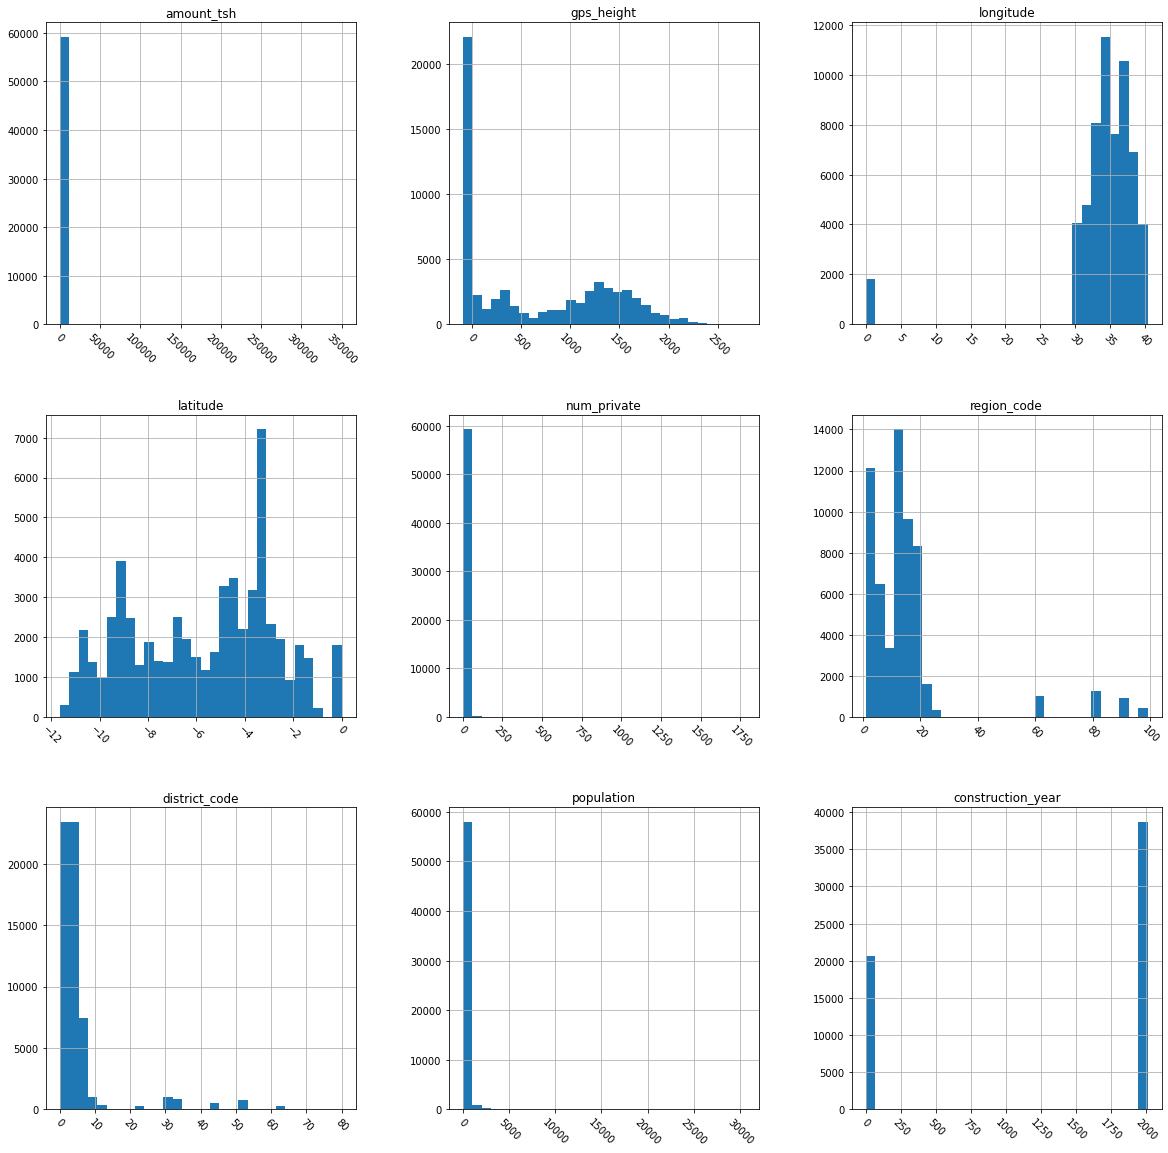

In [26]:
joined_df.hist(figsize=(20,20), bins = 30, xrot=-45 ,)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


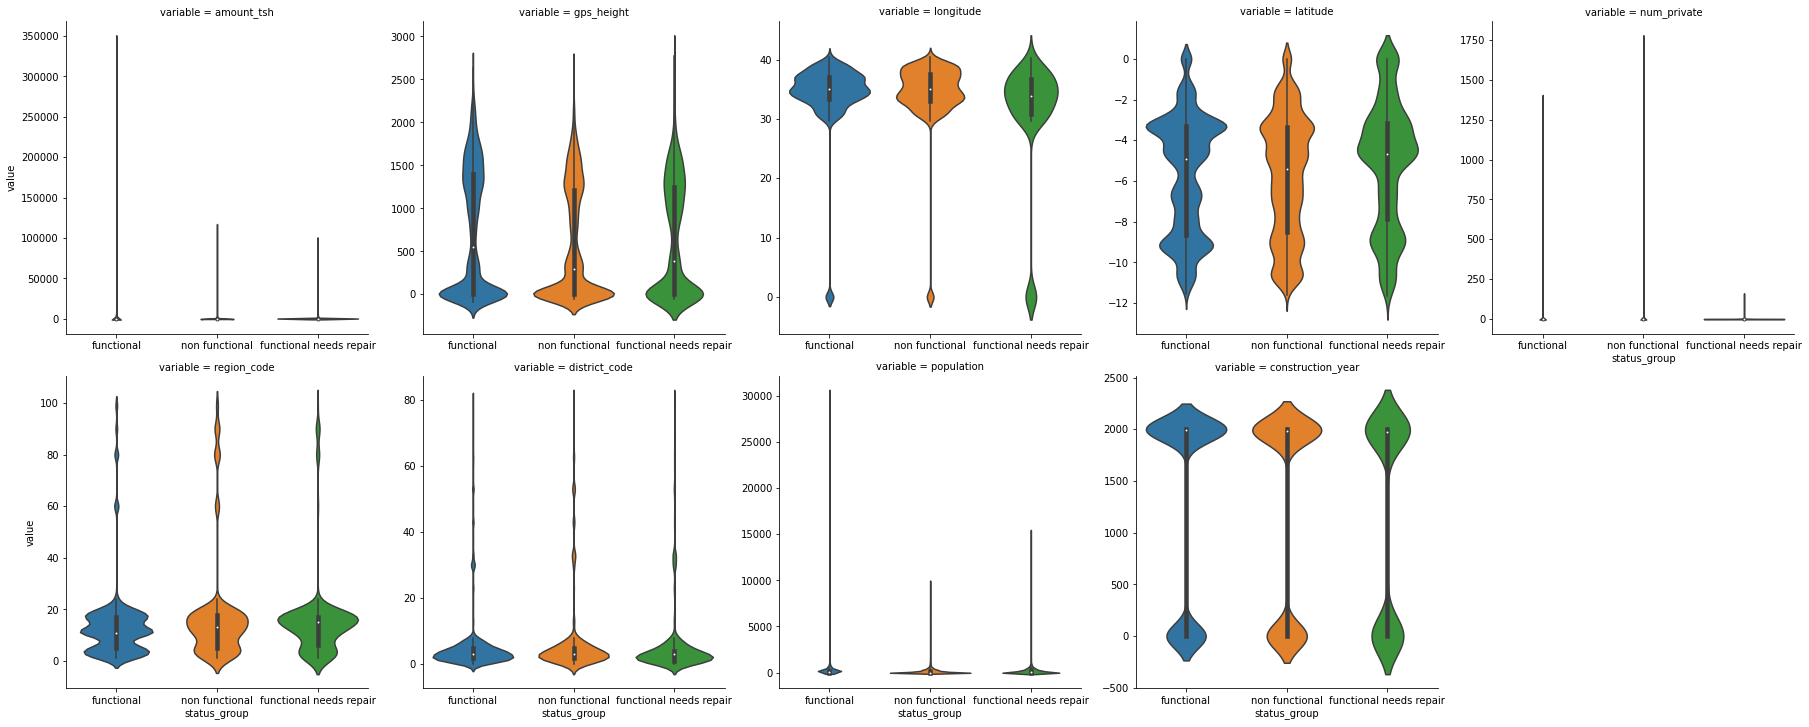

In [27]:
f = pd.melt( joined_df[numeric_cols+["status_group"]], id_vars='status_group', value_vars=numeric_cols)

g = sns.catplot(x="status_group" , y="value",
                col="variable",col_wrap=5,
                data=f, kind="violin",sharey=False,sharex=False);

Large amount of **amount_tsh, gps height, num private, longitude, construction year, population, longitude** values is 0 although this makes sense for gps height ( 0 means at sea level ), amount tsh and longitude ( coordinate ) it does not make sense for the other columns

1. ***longitude and latitude column***


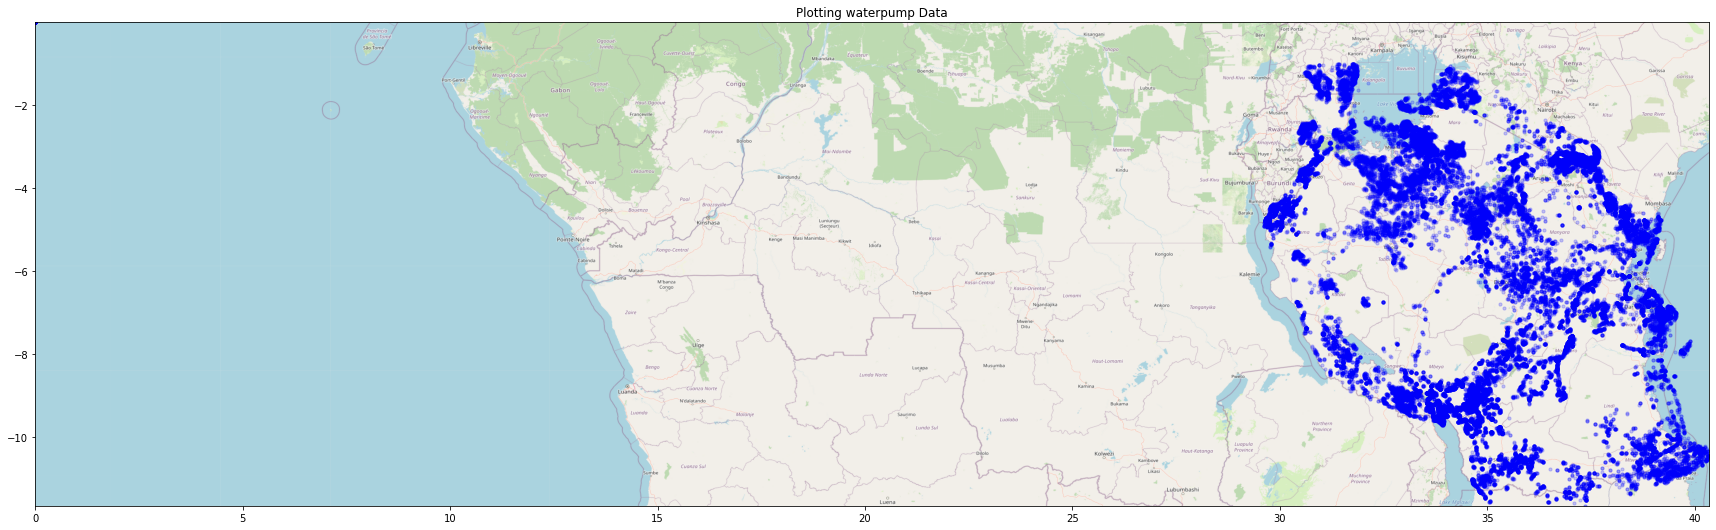

In [28]:
map= plt.imread('/content/drive/MyDrive/Machine Learning/tanzania.png')    # Plotting the points on a map
BBox = ((joined_df.longitude.min(),   joined_df.longitude.max(),      
         joined_df.latitude.min(), joined_df.latitude.max()))
fig, ax = plt.subplots(figsize = (30,30))
ax.scatter(joined_df.longitude, joined_df.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting waterpump Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal')

Outliers observed where latitude and longitude points are placed outside the map of Tanzania

**Analysing object columns**

---



In [29]:
for idx, col in enumerate(object_cols):
    count_plot(
        col, 'status_group', joined_df
    )

date_recorded
2011-03-15    572.0
2011-03-17    558.0
2013-02-03    546.0
2011-03-14    520.0
2011-03-16    513.0
              ...  
2011-09-16      1.0
2011-09-15      1.0
2011-09-14      1.0
2011-09-13      1.0
2002-10-14      1.0
Length: 356, dtype: float64

funder
Government Of Tanzania    9084.0
Danida                    3114.0
Hesawa                    2202.0
Rwssp                     1374.0
World Bank                1349.0
                           ...  
Mwanamisi Ally               1.0
Mwanza                       1.0
Mwingereza                   1.0
Mwinjuma Mzee                1.0
Mganga                       1.0
Length: 1897, dtype: float64

installer
DWE                 17402.0
Government           1825.0
RWE                  1206.0
Commu                1060.0
DANIDA               1050.0
                     ...   
Mwakabalula             1.0
Mwalimu  Muhenza        1.0
Mwalimu  Muhenzi        1.0
Mwamama                 1.0
Magani                  1.0
Length: 2145, dtype

In [32]:
def plot_graph(graph_column):
  fig, ax = plt.subplots(len(graph_cols), 1, figsize=(15,15))
  for idx, col in enumerate(graph_column):
    column_plot(col, 'status_group', joined_df, ax=ax[idx])
    ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='status_group')
    fig.tight_layout()        #average ratio of column values under each target column



1.   ***scheme_management / management / management_group columns***



In [30]:
joined_df.groupby(['management_group','management']).count() 

amount_tsh  ...  status_group
management_group management                    ...              
commercial       company                  685  ...           685
                 private operator        1971  ...          1971
                 trust                     78  ...            78
                 water authority          904  ...           904
other            other                    844  ...           844
                 other - school            99  ...            99
parastatal       parastatal              1768  ...          1768
unknown          unknown                  561  ...           561
user-group       vwc                    40507  ...         40507
                 water board             2933  ...          2933
                 wua                     2535  ...          2535
                 wug                     6515  ...          6515

[12 rows x 38 columns]

Scheme management and management have nearly the same values

Management is a sub category of management group. Management has more detailed values

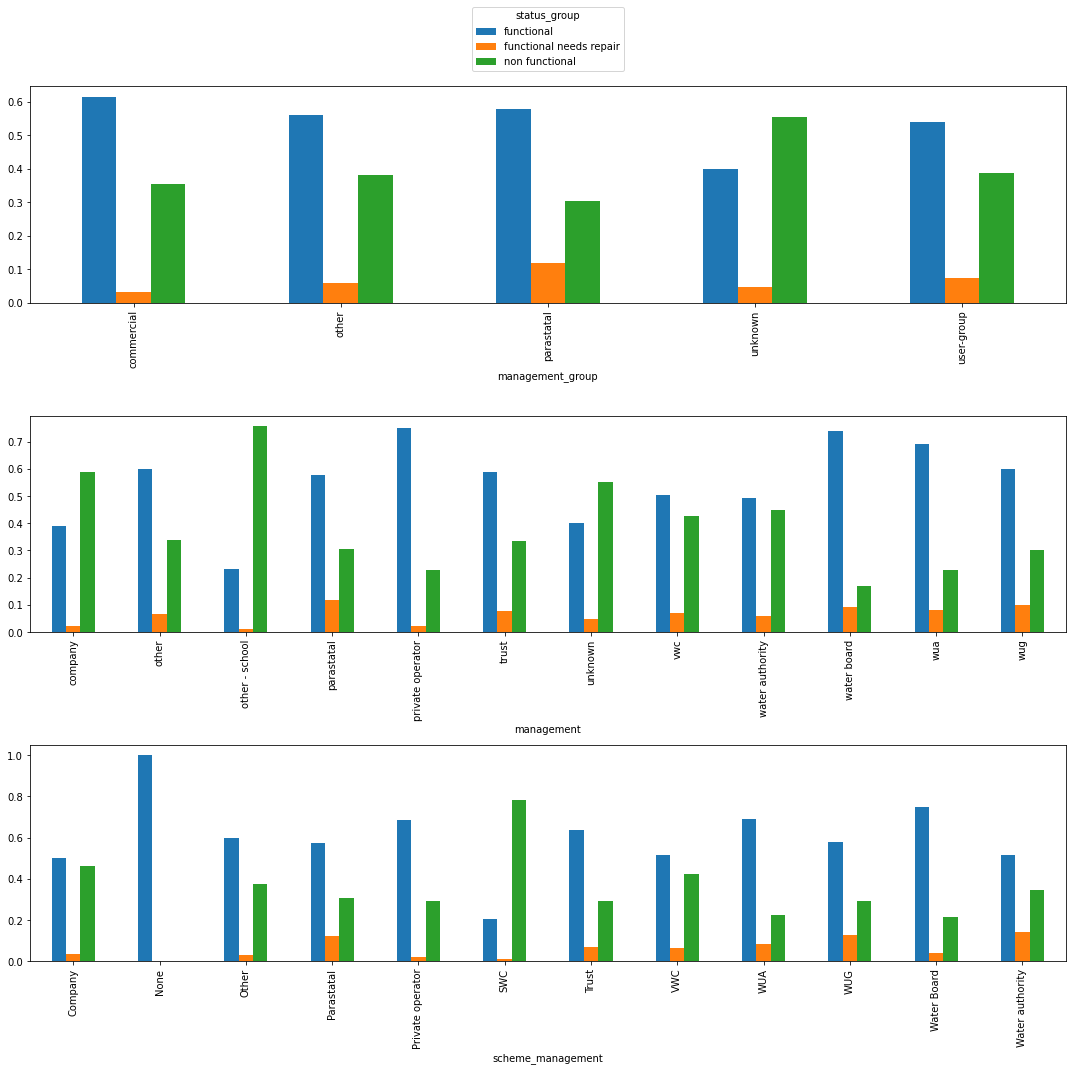

In [33]:
graph_cols = ['management_group','management', 'scheme_management']
plot_graph(graph_cols)

The percentage of parastatal management and water authority gives the largest ratio of well functional but needs repair. Only functional wells seem to have missing management values. Large number of functional wells are commercial and large number of non functional wells are under the school management or unknown 

  2.   ***source / source_type / source_class columns***



In [34]:
joined_df.groupby(['source_class','source']).count()

amount_tsh  ...  status_group
source_class source                            ...              
groundwater  hand dtw                     874  ...           874
             machine dbh                11075  ...         11075
             shallow well               16824  ...         16824
             spring                     17021  ...         17021
surface      dam                          656  ...           656
             lake                         765  ...           765
             rainwater harvesting        2295  ...          2295
             river                       9612  ...          9612
unknown      other                        212  ...           212
             unknown                       66  ...            66

[10 rows x 38 columns]

Source class is a sub category of source 

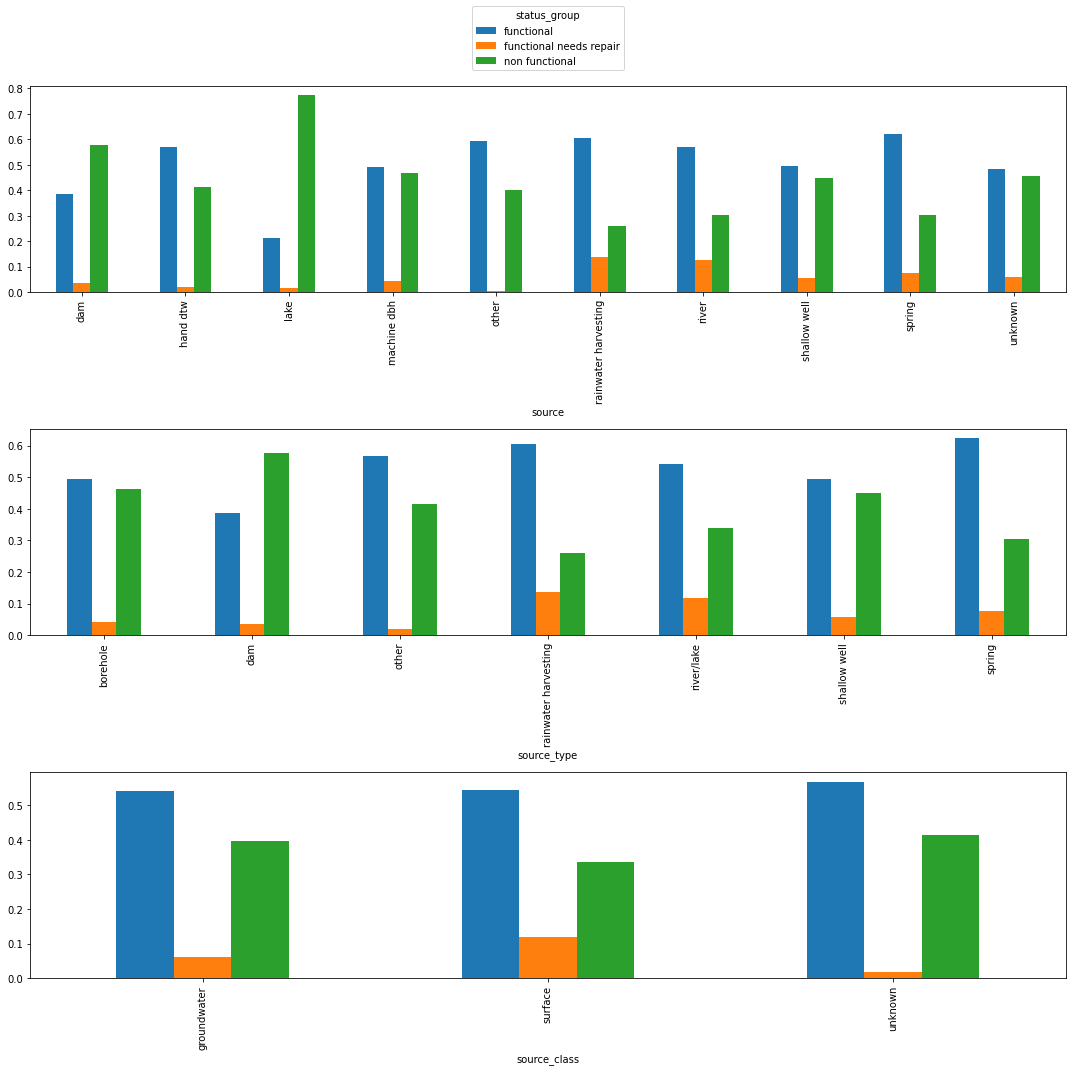

In [35]:
graph_cols = ['source','source_type', 'source_class']
plot_graph(graph_cols)

There are lots of non-functional ground water. And, machine dbh and swallow well sources nearly have same functional and non-functional waterpoints.

3.   ***water_quality / quality_group columns***


In [36]:
joined_df.groupby(['quality_group','water_quality']).count()

amount_tsh  ...  status_group
quality_group water_quality                   ...              
colored       coloured                   490  ...           490
fluoride      fluoride                   200  ...           200
              fluoride abandoned          17  ...            17
good          soft                     50818  ...         50818
milky         milky                      804  ...           804
salty         salty                     4856  ...          4856
              salty abandoned            339  ...           339
unknown       unknown                   1876  ...          1876

[8 rows x 38 columns]

Water quality consists of sub categories of columns in quality group

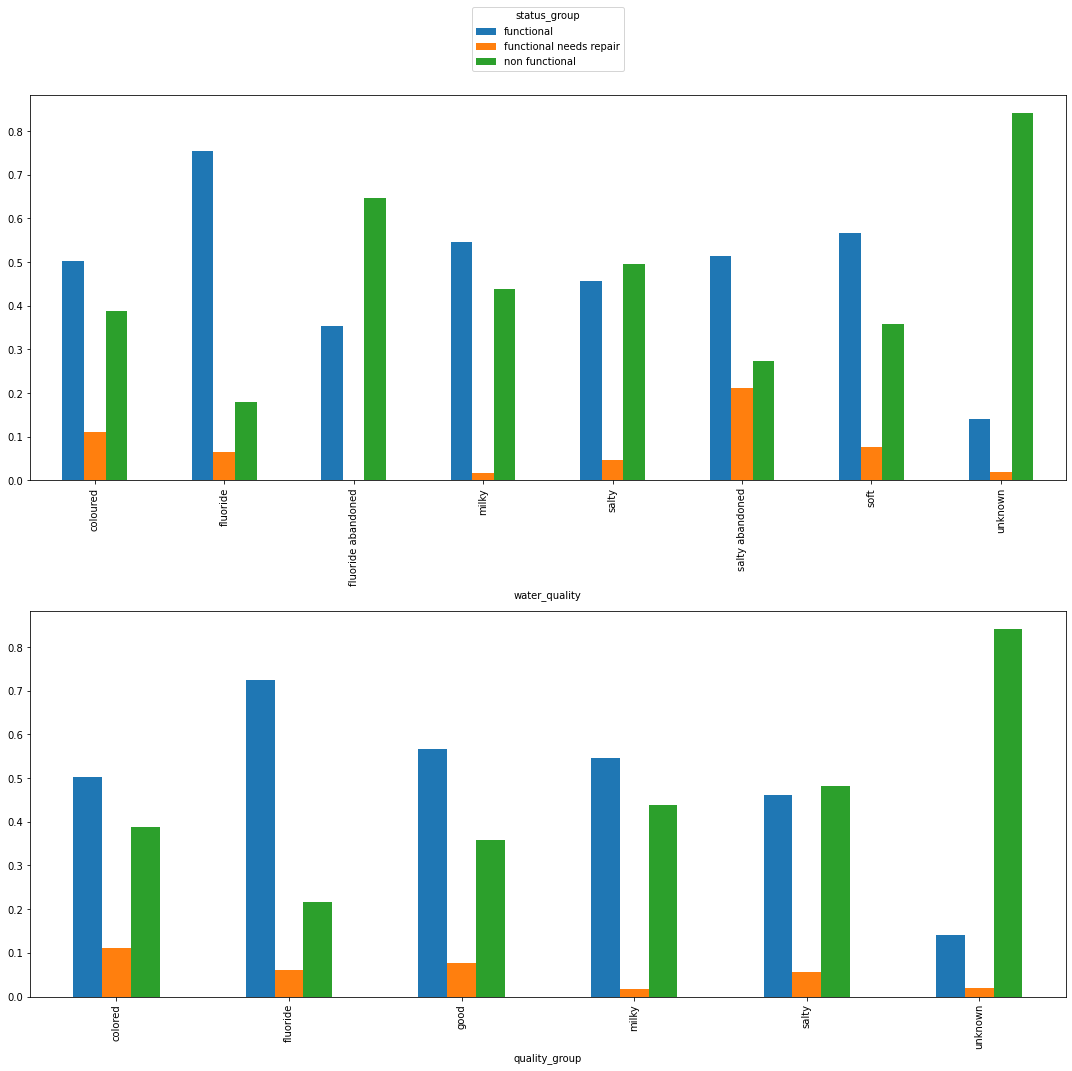

In [37]:
graph_cols = ['water_quality','quality_group']
plot_graph(graph_cols)

Lots of non-functional water points have soft, good water quality.

4.   ***extraction_type / extraction_type_group / extraction_type_class columns***

In [38]:
joined_df.groupby(['extraction_type_class','extraction_type_group']).count()

amount_tsh  ...  status_group
extraction_type_class extraction_type_group              ...              
gravity               gravity                     26780  ...         26780
handpump              afridev                      1770  ...          1770
                      india mark ii                2400  ...          2400
                      india mark iii                 98  ...            98
                      nira/tanira                  8154  ...          8154
                      other handpump                364  ...           364
                      swn 80                       3670  ...          3670
motorpump             mono                         2865  ...          2865
                      other motorpump               122  ...           122
other                 other                        6430  ...          6430
rope pump             rope pump                     451  ...           451
submersible           submersible                  6179  ...          6179
wind-powered          wind-powered                  117  ...           117

[13 rows x 38 columns]

Extraction type class consists of sub categories of columns in extractio type group

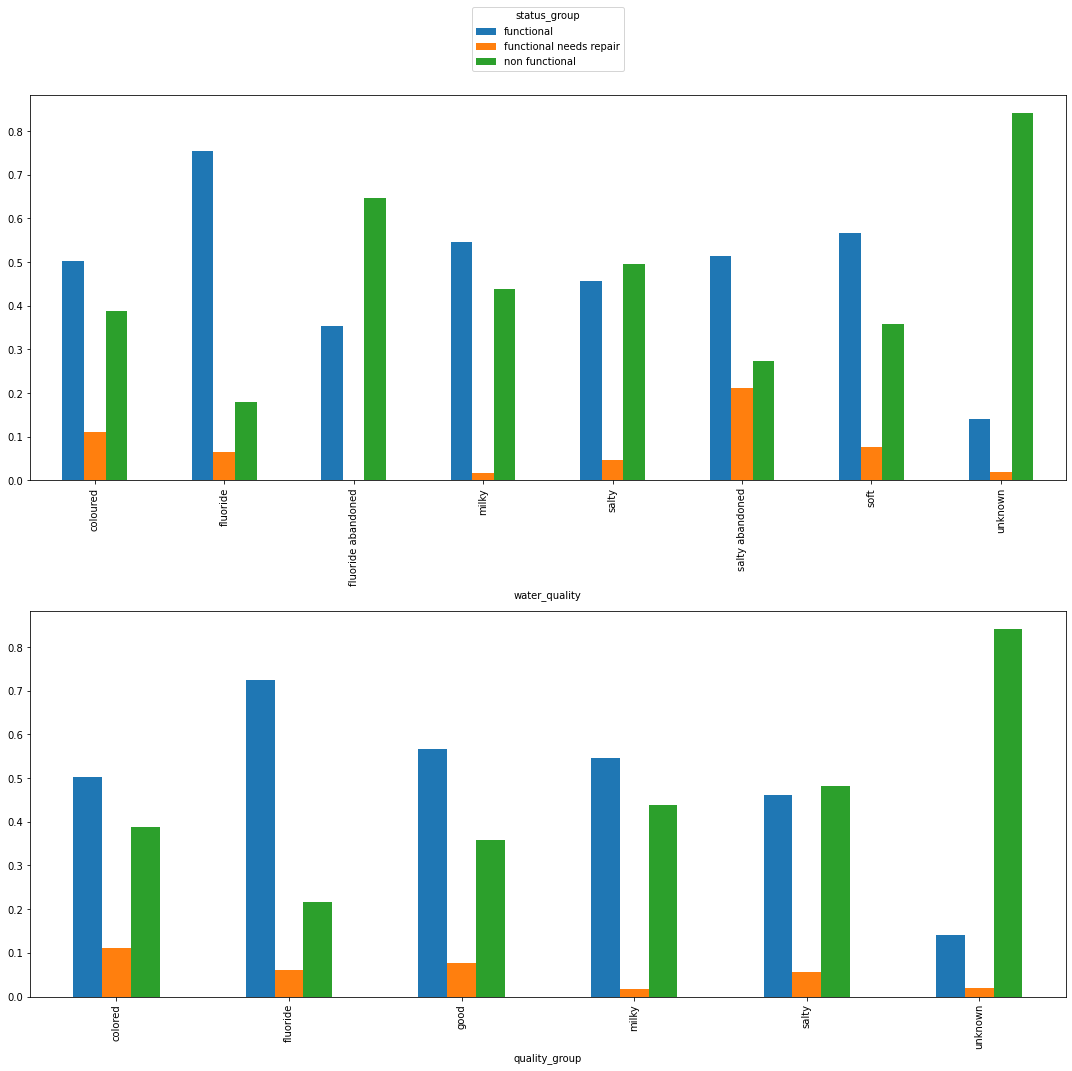

In [39]:
graph_cols = ['water_quality','quality_group']
plot_graph(graph_cols)

Other and mono extraction types have higher change to be non-functional than functional.

5.   ***waterpoint_type / waterpoint_type_group***

In [40]:
joined_df.groupby(['waterpoint_type_group','waterpoint_type']).count()

amount_tsh  ...  status_group
waterpoint_type_group waterpoint_type                          ...              
cattle trough         cattle trough                       116  ...           116
communal standpipe    communal standpipe                28522  ...         28522
                      communal standpipe multiple        6103  ...          6103
dam                   dam                                   7  ...             7
hand pump             hand pump                         17488  ...         17488
improved spring       improved spring                     784  ...           784
other                 other                              6380  ...          6380

[7 rows x 38 columns]

Waterpoint type consists of sub categories of columns in waterpoint type group

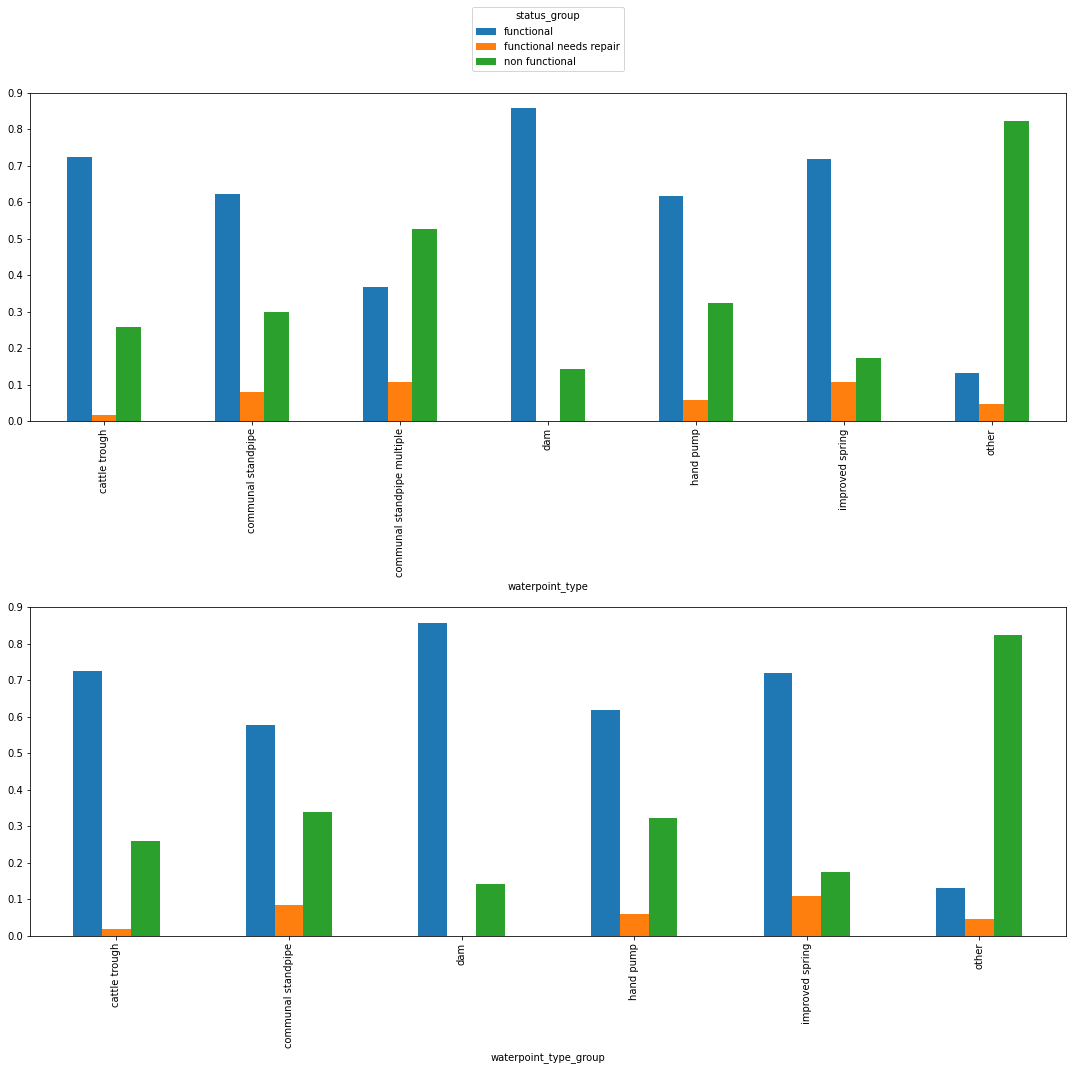

In [41]:
graph_cols = ['waterpoint_type','waterpoint_type_group']
plot_graph(graph_cols)

Waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality

6.   ***Other columns***

In [42]:
# payment / payment_type columns

print('\033[1m' + "PAYMENT" + '\033[0m')
print(joined_df['payment'].value_counts())
print()
print('\033[1m' + "PAYMENT_TYPE" + '\033[0m')
print(joined_df['payment_type'].value_counts())

PAYMENT
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

PAYMENT_TYPE
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


In [43]:
# quantity / quantity_group columns

print('\033[1m' + "QUANTITY" + '\033[0m')
print(joined_df['quantity'].value_counts())
print()
print('\033[1m' + "QUANTITY_GROUP" + '\033[0m')
print(joined_df['quantity_group'].value_counts())

QUANTITY
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

QUANTITY_GROUP
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


Both the pairs **payment and payment type** and **quantity and quantity group** are duplicate fields with the same columns with different names. One column from each pair can be dropped

In [44]:
#recorded_by column

joined_df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

Recorded by contains only one unique value for all the datapoints. Can be dropped

**Analysing Target values**

---



In [45]:
joined_df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

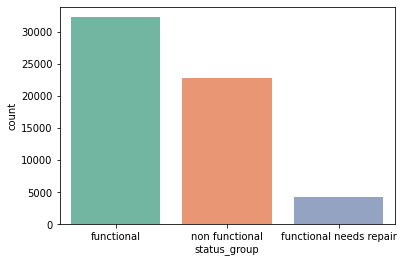

In [46]:
sns.countplot(x="status_group", data=labels_df, palette="Set2")

High class imbalance is observed. Where nearly 55 % falls under functional and only around 7% in the functional needs repair